In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.datasets import make_classification

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

### Impact on TPR, FPR, ROC-AUC if Predicted Probabilities are squared

1. https://www.scaler.com/academy/mentee-dashboard/class/83727/assignment/problems/17691?navref=cl_tt_lst_nm
2. IMP DISCUSSIONS ON HOW TO SELECT BEST THRESHOLD: <br> https://stats.stackexchange.com/a/386433 <br>https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

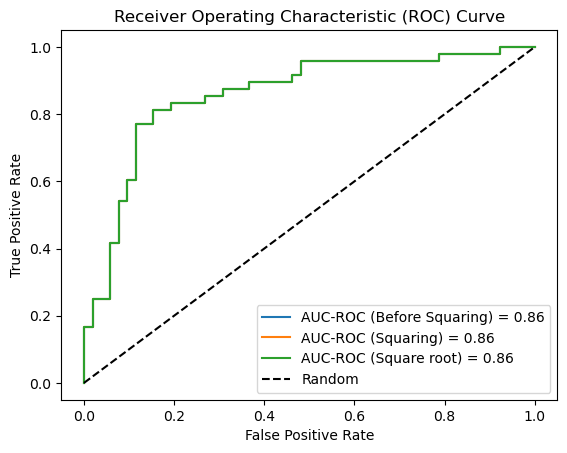

In [6]:
# Generate demo dataset
X_demo, y_demo = make_classification(n_samples=100, n_features=3, n_redundant=1, n_informative=2, n_repeated=0, 
                                     random_state = 41, flip_y=0.1)

# Fit logistic regression model
lr = LogisticRegression()
lr.fit(X_demo, y_demo)

# Calculate predicted probabilities
y_proba = lr.predict_proba(X_demo)[:, 1]
y_proba_squared = y_proba ** 2
y_proba_sqroot = np.sqrt(y_proba)

# Calculate AUC-ROC
fpr, tpr, thresholds = roc_curve(y_demo, y_proba)
auc = roc_auc_score(y_demo, y_proba)

# Calculate AUC-ROC after squaring probabilities
fpr_squared, tpr_squared, thresholds_squared = roc_curve(y_demo, y_proba_squared)
auc_squared = roc_auc_score(y_demo, y_proba_squared)

# Calculate AUC-ROC after taking sqr root probabilities
fpr_sqroot, tpr_sqroot, thresholds_sqroot = roc_curve(y_demo, y_proba_sqroot)
auc_sqroot = roc_auc_score(y_demo, y_proba_squared)

# Plot ROC curves
plt.plot(fpr, tpr, label=f'AUC-ROC (Before Squaring) = {auc:.2f}')
plt.plot(fpr_squared, tpr_squared, label=f'AUC-ROC (Squaring) = {auc_squared:.2f}')
plt.plot(fpr_sqroot, tpr_sqroot, label=f'AUC-ROC (Square root) = {auc_sqroot:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [7]:
fpr - fpr_sqroot

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

C:\Users\Mrudul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


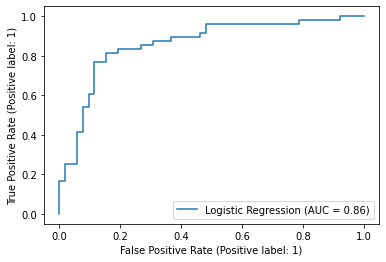

In [5]:
plot_roc_curve(lr, X_demo, y_demo, name = 'Logistic Regression')
plt.show()

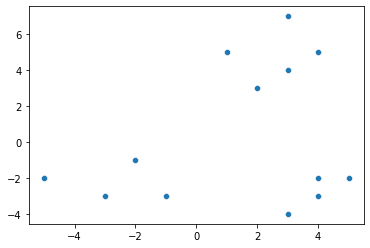

In [14]:
tup_arr = [(3,-4), (2,3), (-5,-2), (-3,-3), (3, 7), (5,-2), (4,5), (-2,-1), (3, 4), (1,5), (-1,-3), (4, -2), (4, -3)]
x = [ele[0] for ele in tup_arr]
y = [ele[1] for ele in tup_arr]

sns.scatterplot(x = x, y = y)
plt.show()

In [55]:
# Create data
x = np.random.rand(1000, 1)
y = (0.7*(x**5) - 2.1*(x**4) + 2.3*(x**3) + 0.2*(x**2) + 0.3*(x) + 0.4)*np.random.rand(1000,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Function definitions
def predict(x, w):
    return np.dot(x, w)

def loss(y, y_pred):
    return ((y_pred - np.squeeze(y))**2).mean()

def gd_update(x, y, y_pred, w, eta=0.1):
    grad = (2 / len(y)) * np.dot(y_pred - np.squeeze(y), x)
    w_new = w - (eta * grad)
    return w_new, grad

def gradient_descent(x, y, epochs, eta=0.1):
    w = np.zeros(x.shape[1])
    losses = []
    weights = []
    grads = []
    for i in range(epochs):
        y_pred = predict(x, w)
        loss_epoch = loss(y, y_pred)
        w_new, grad = gd_update(x, y, y_pred, w, eta=eta)
        w = w_new
        
        losses.append(loss_epoch)
        weights.append(w)
        grads.append(grad)

    return np.array(losses), np.array(weights), np.array(grads), w_new

# Data preparation for training
deg = 10
poly = PolynomialFeatures(degree=deg)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_poly)
x_test_scaled = scaler.transform(x_test_poly)

# Model training
epochs = 500
eta = 0.01
losses, weights, grads, w = gradient_descent(x_train_scaled, y_train, epochs=epochs, eta=eta)

In [49]:
x_train_poly.shape

(800, 11)

<AxesSubplot:>

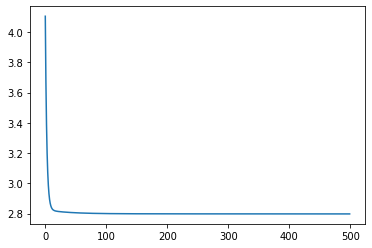

In [31]:
sns.lineplot(x = np.arange(0, 500, 1), y = losses)

In [41]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr.predict(x_test)

ValueError: X has 1 features, but LinearRegression is expecting 11 features as input.

In [60]:
x_train_poly[:, 10]

array([2.47083921e-04, 9.68728312e-20, 4.75691604e-09, 1.27900351e-04,
       2.35043085e-07, 3.17962702e-01, 1.65803767e-02, 1.78253944e-05,
       7.64306563e-06, 3.95053649e-01, 3.89277877e-04, 3.62018026e-03,
       1.71776451e-14, 1.43949467e-01, 8.18595682e-01, 1.64073578e-05,
       2.84156404e-14, 1.15722827e-01, 9.57087198e-04, 1.44483703e-03,
       1.92894072e-03, 2.64769211e-01, 5.48177565e-06, 6.60635326e-06,
       4.09567439e-03, 1.19372823e-02, 7.86563485e-01, 8.48507411e-06,
       1.84807922e-05, 3.56689349e-03, 2.81198026e-02, 8.81497154e-19,
       4.30562581e-02, 2.49860498e-01, 5.69108186e-04, 4.71798055e-01,
       5.40700360e-03, 7.89379469e-04, 7.48206327e-04, 1.71545138e-04,
       4.71351062e-02, 1.05782006e-15, 1.85253178e-07, 3.66270572e-03,
       2.99210082e-01, 1.82477299e-06, 9.39014967e-08, 1.56639562e-11,
       6.46355823e-01, 4.23567203e-03, 3.98144166e-02, 8.97191047e-02,
       1.00987128e-01, 2.44540507e-07, 9.25678477e-05, 8.84418184e-08,
      

### MISC

<b> ML Logistic Regression </b>

Consider the data collected from 500 customers in a restaurant. It is observed that 40 of the 80 customers tipped the server who was wearing a black jacket, and 300 of the 420 customers tipped the server who was wearing a different color.
Say x=1 indicates that the server is wearing a black jacket. There will be 420 customers with x=0 and 80 with x=1. And y denotes the event of tipping a server (1 meaning tipped). Use this data to fit a scikit learn logistic regression model to compute the equation for computing the log-odds of giving a tip based on the color of the server’s jacket.

https://www.scaler.com/academy/mentee-dashboard/class/83723/homework/problems/23535/?navref=cl_pb_nv_tb

In [69]:
ct = pd.crosstab(index = ["Yes", "No"], columns = ["Black", "Not Black"], 
            rownames = ["Tipped"], colnames = ["Dress Colour"])
ct.loc["Yes", "Black"] = 40
ct.loc["No", "Black"] = 80-40
ct.loc["Yes", "Not Black"] = 300
ct.loc["No", "Not Black"] = 420-300
ct

Dress Colour,Black,Not Black
Tipped,,
No,40,120
Yes,40,300


In [133]:
cols = ["Black Jacket", "Tipped"]
mat = np.zeros((500,2))
mat[0:40, :] = 1 # 40 black jakcet servers got tipped --> [1, 1]
mat[40:80, 0] = 1 # 40 black jacket servers didn't get tipped --> [1, 0]
mat[80:380, 1] = 1 # 300 serves not wearing black got tipped --> [0, 1]
# 120 servers not wearing black didn't get tipped --> [0, 0]

temp_df = pd.DataFrame(data = mat, columns = cols)
temp_df

,Black Jacket,Tipped
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
495,0.0,0.0
496,0.0,0.0
497,0.0,0.0
498,0.0,0.0


In [141]:
log_reg = LogisticRegression()
log_reg.fit(temp_df["Black Jacket"].values.reshape(-1,1), temp_df["Tipped"])
print(log_reg.coef_, log_reg.intercept_)

[[-0.86308637]] [0.90624451]
